In [1]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import prepare, model, explore

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

### Wrangle Data

In [31]:
# Load features and target datasets

df_features = pd.read_csv('train_features.csv', index_col=0)
df_targets = pd.read_csv('train_targets_scored.csv', index_col=0)

# Print the shapes
df_features.shape, df_targets.shape

((23814, 875), (23814, 206))

In [4]:
# Take a look at the df_features
df_features.head()

cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3     g-4  \
sig_id                                                                          
id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208 -0.1944   
id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604  1.0190   
id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764 -0.0323   
id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288  4.0620   
id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919  1.4180   

                 g-5     g-6  ...    c-90    c-91    c-92    c-93    c-94  \
sig_id                        ...                                           
id_000644bb2 -1.0120 -1.0220  ...  0.2862  0.2584  0.8076  0.5523 -0.1912   
id_000779bfc  0.5207  0.2341  ... -0.4265  0.7543  0.4708  0.0230  0.2957   
id_000a6266a  1.2390  0.1715  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240   
id_0015fd391 -0.8095 -1.9590  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632   
id_001626bd3 -0.8244 -0.2800  ...  0.0042  0.0048  0.6670  1.0690  0.5523   

                c-95    c-96    c-97    c-98    c-99  
sig_id                                                
id_000644bb2  0.6584 -0.3981  0.2139  0.3801  0.4176  
id_000779bfc  0.4899  0.1522  0.1241  0.6077  0.7371  
id_000a6266a -0.3174 -0.6417 -0.2187 -1.4080  0.6931  
id_0015fd391 -1.2880 -1.6210 -0.8784 -0.3876 -0.8154  
id_001626bd3 -0.3031  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 875 columns]

### PCA visualization of high-frequent MoA annotations

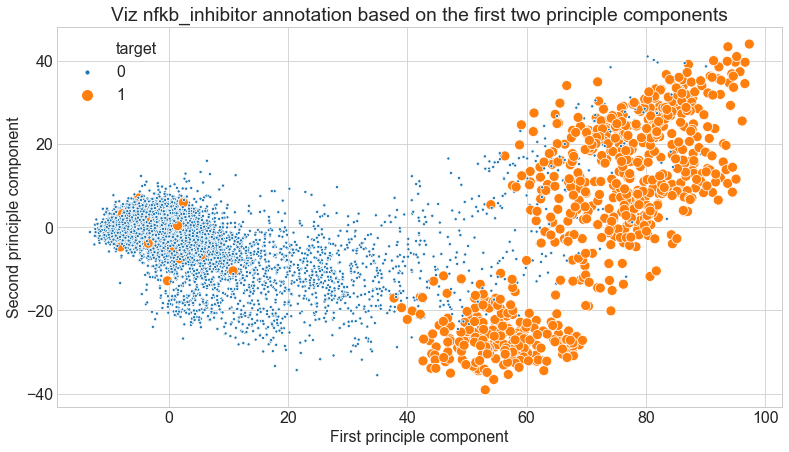

In [34]:
# nfkb
explore.pca_viz(df_features, df_targets, 'nfkb_inhibitor') # 527 correct out of 597

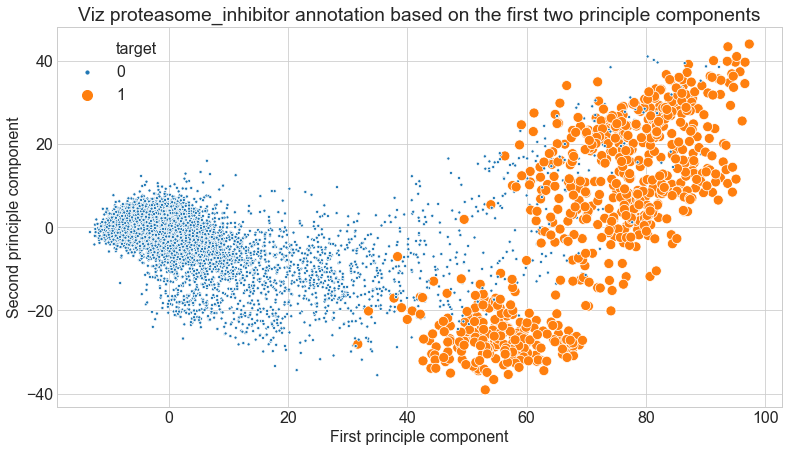

In [35]:
# Proteasome_inhibitor
explore.pca_viz(df_features, df_targets, 'proteasome_inhibitor') # 519 correct out of 517

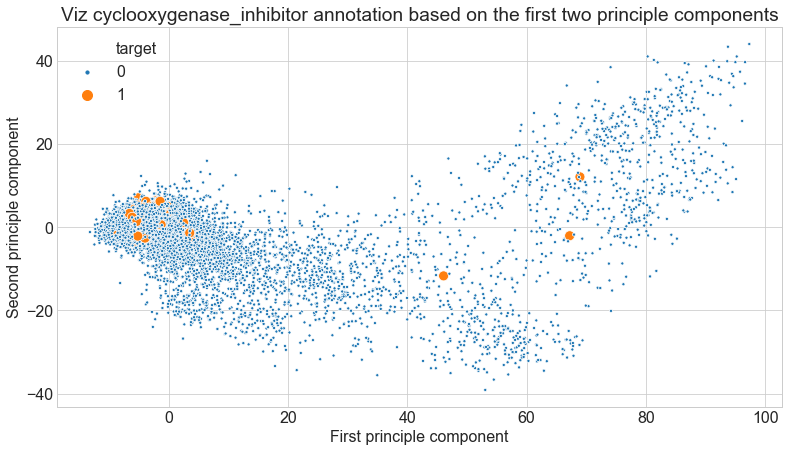

In [15]:
# cyclooxygenase_inhibitor
explore.pca_viz(df_features, df_targets, 'cyclooxygenase_inhibitor') # 1 correct out of 315

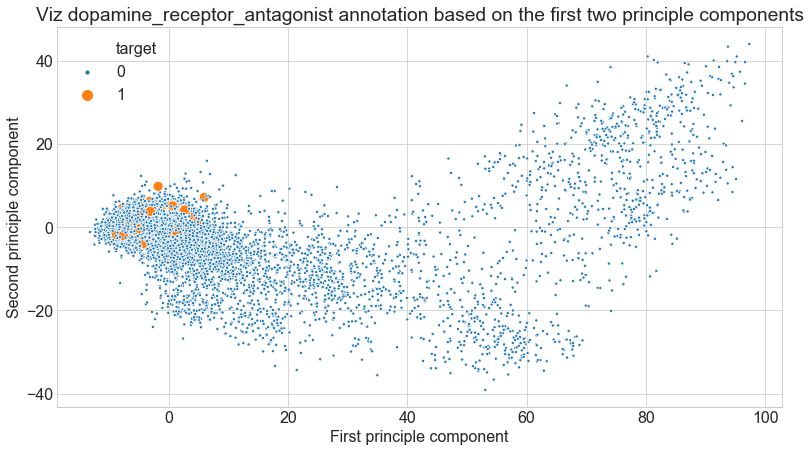

In [16]:
# dopamine_receptor_antagonist
explore.pca_viz(df_features, df_targets, 'dopamine_receptor_antagonist') # 0 correct of 302

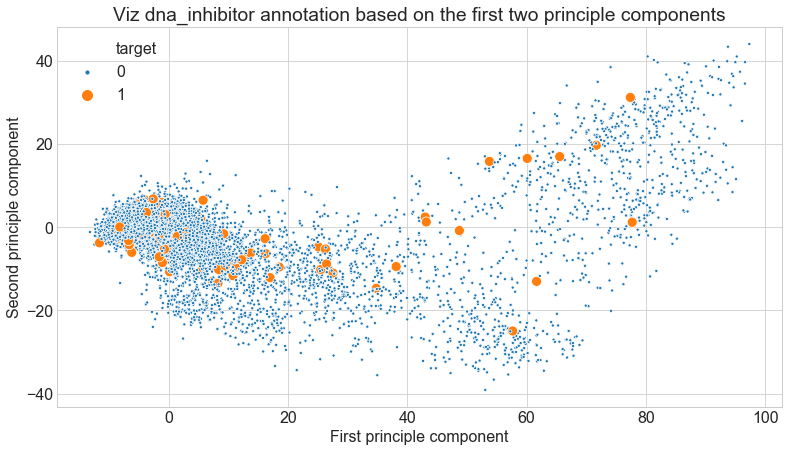

In [17]:
# dna_inhibitor
explore.pca_viz(df_features, df_targets, 'dna_inhibitor') # 13 correct of 291

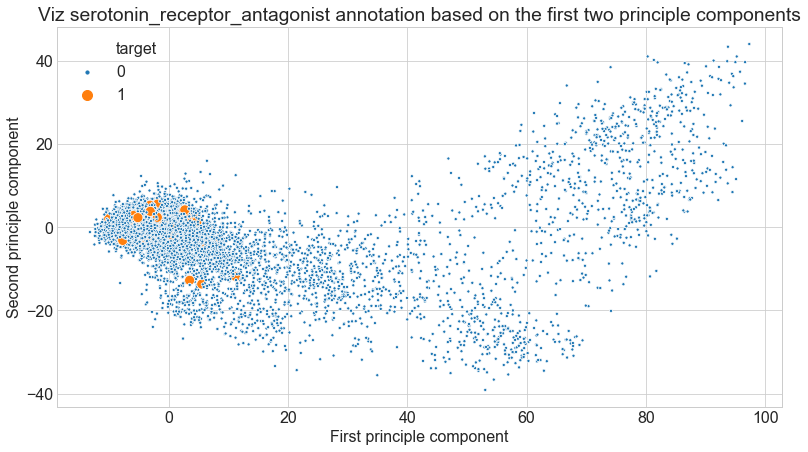

In [18]:
# serotonin_receptor_antagonist
explore.pca_viz(df_features, df_targets, 'serotonin_receptor_antagonist') # 0 correct out of 280

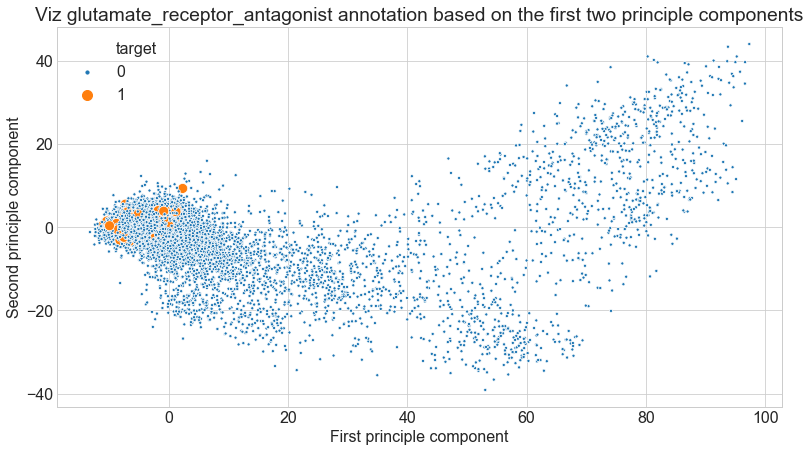

In [19]:
# glutamate_receptor_antagonist
explore.pca_viz(df_features, df_targets, 'glutamate_receptor_antagonist') # 0 correct of 271

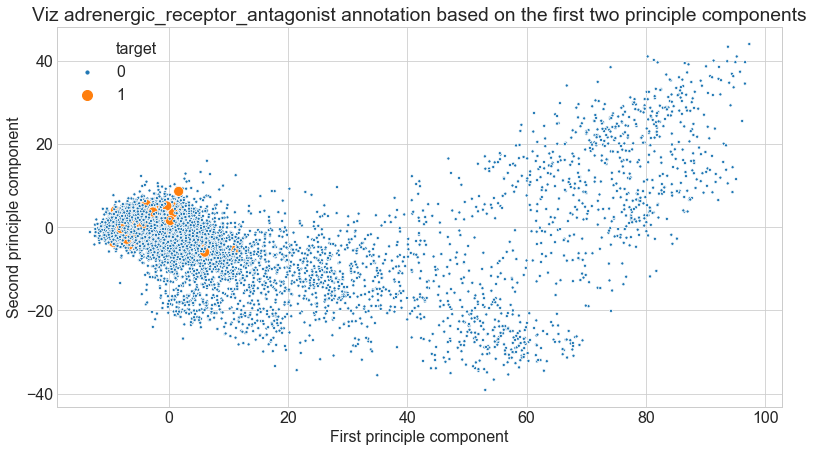

In [20]:
# adrenergic_receptor_antagonist
explore.pca_viz(df_features, df_targets, 'adrenergic_receptor_antagonist') # 0 correct of 270

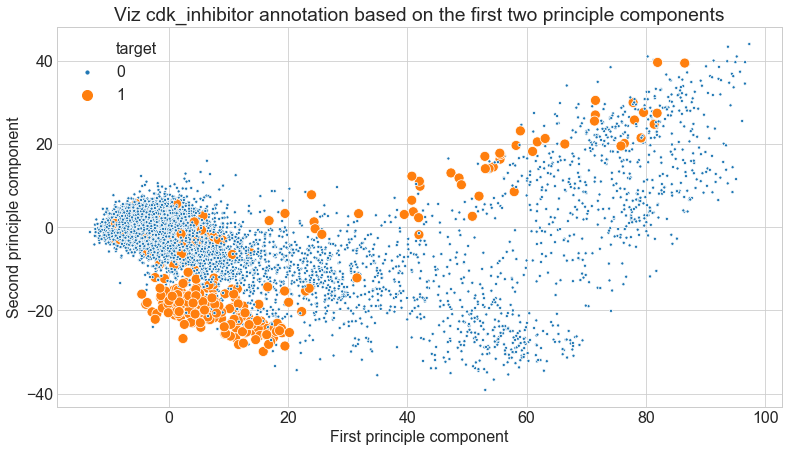

In [21]:
# cdk_inhibitor
explore.pca_viz(df_features, df_targets, 'cdk_inhibitor') # 189 correct of 246

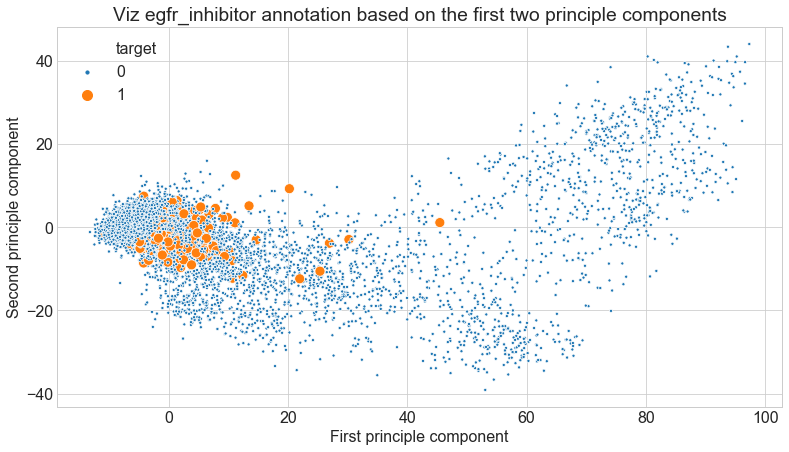

In [22]:
# egfr_inhibitor
explore.pca_viz(df_features, df_targets, 'egfr_inhibitor') # 245 correct out of 237 

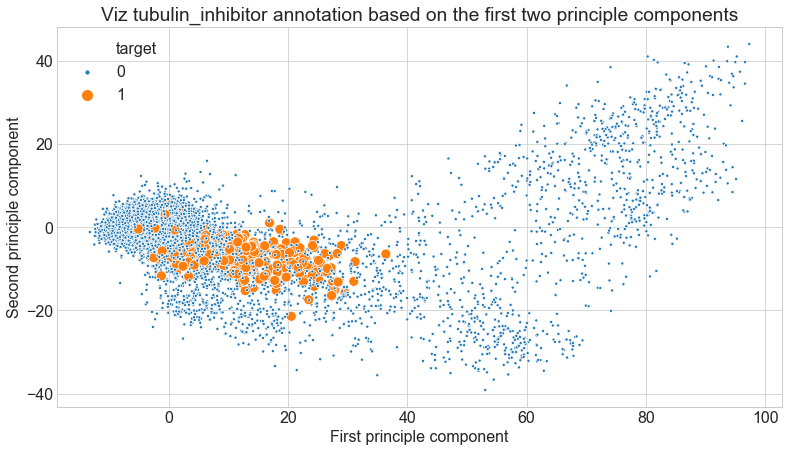

In [23]:
# tubulin_inhibitor
explore.pca_viz(df_features, df_targets, 'tubulin_inhibitor') # 211 correct of 227

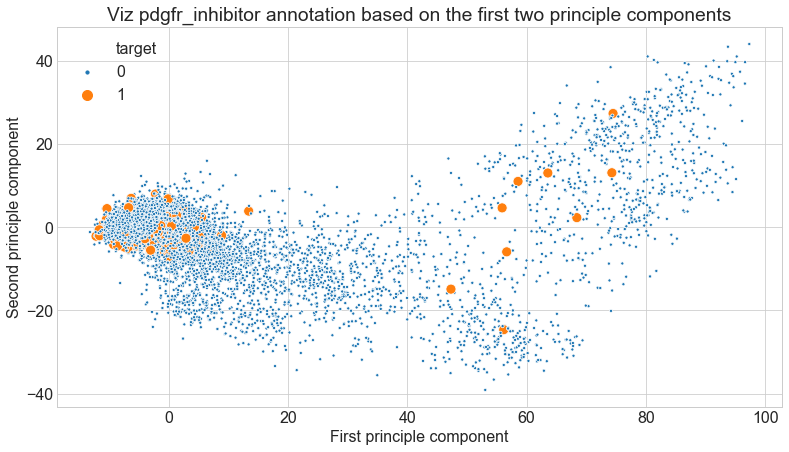

In [24]:
# pdgfr_inhibitor
explore.pca_viz(df_features, df_targets, 'pdgfr_inhibitor') # 187 correct out of 226

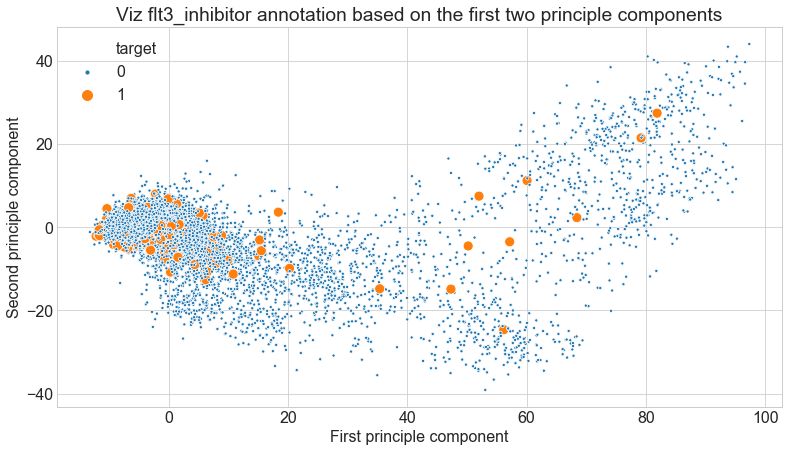

In [25]:
# flt3_inhibitor
explore.pca_viz(df_features, df_targets, 'flt3_inhibitor') # 184 of out 214

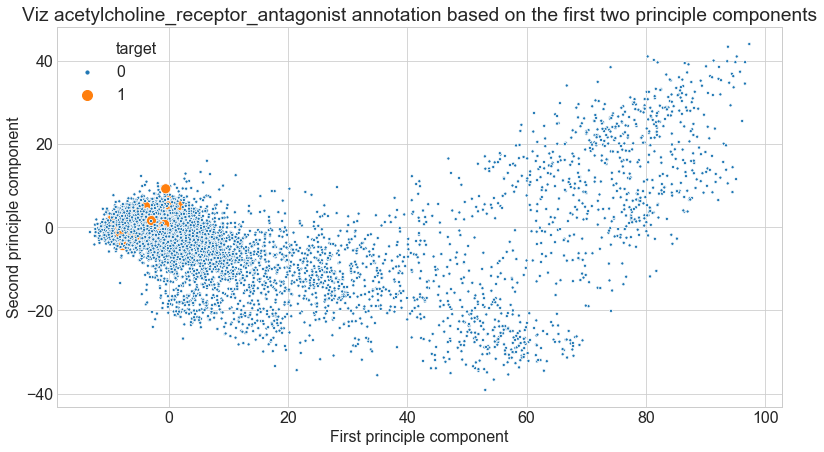

In [26]:
# acetylcholine_receptor_antagonist
explore.pca_viz(df_features, df_targets, 'acetylcholine_receptor_antagonist') # 0 correct of 213

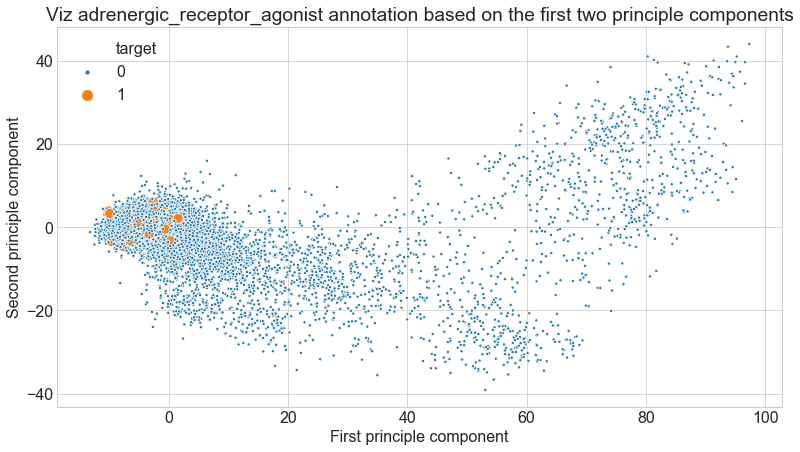

In [27]:
# adrenergic_receptor_agonist
explore.pca_viz(df_features, df_targets, 'adrenergic_receptor_agonist') # 1 correct of 212

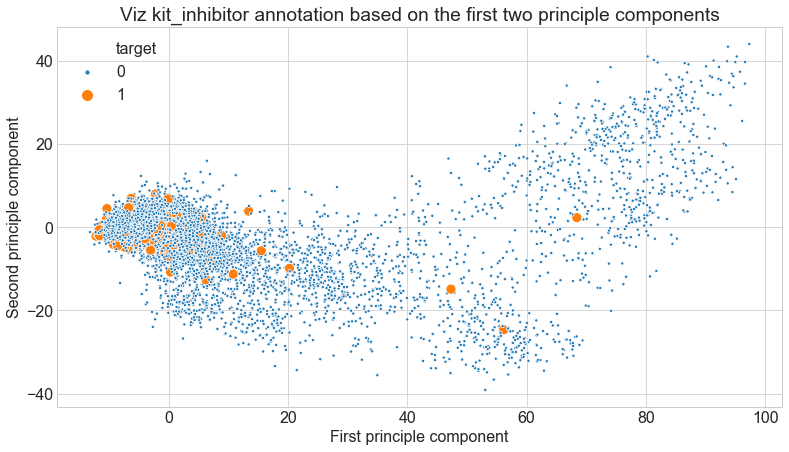

In [28]:
# kit_inhibitor
explore.pca_viz(df_features, df_targets, 'kit_inhibitor') # 178 correct of 209

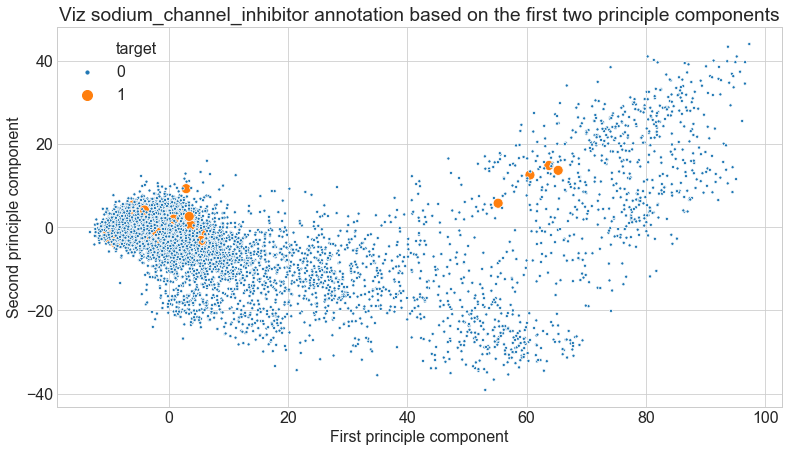

In [29]:
# sodium_channel_inhibitor
explore.pca_viz(df_features, df_targets, 'sodium_channel_inhibitor') # 0 correct of 202

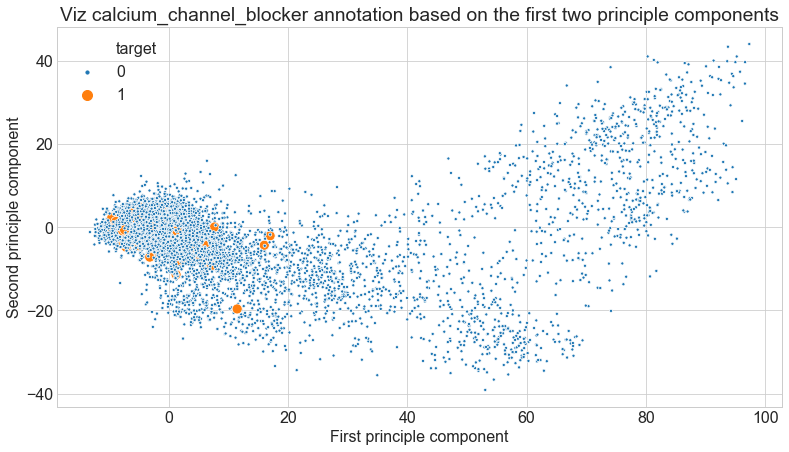

In [30]:
# calcium_channel_blocker
explore.pca_viz(df_features, df_targets, 'calcium_channel_blocker') # 0 correct of 200

### PCA visualization of experiment conditions

In [25]:
# Reassign the the cp conditions to df_targets

df_targets = df_features.iloc[:, 0:3]
df_targets.head()

cp_type  cp_time cp_dose
sig_id                               
id_000644bb2  trt_cp       24      D1
id_000779bfc  trt_cp       72      D1
id_000a6266a  trt_cp       48      D1
id_0015fd391  trt_cp       48      D1
id_001626bd3  trt_cp       72      D2

In [26]:
# Map the cp_time to from hours to days
df_targets.cp_time = df_targets.cp_time.map({24: '1 day', 48: '2 days', 72: '3 days'})

In [27]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23814 entries, id_000644bb2 to id_ffffdd77b
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cp_type  23814 non-null  object
 1   cp_time  23814 non-null  object
 2   cp_dose  23814 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


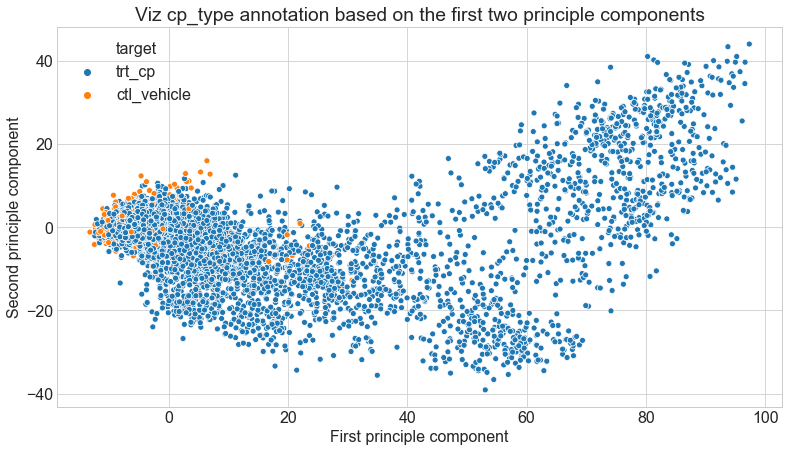

In [6]:
# cp_type
explore.pca_viz_condition(df_features, df_targets, 'cp_type')

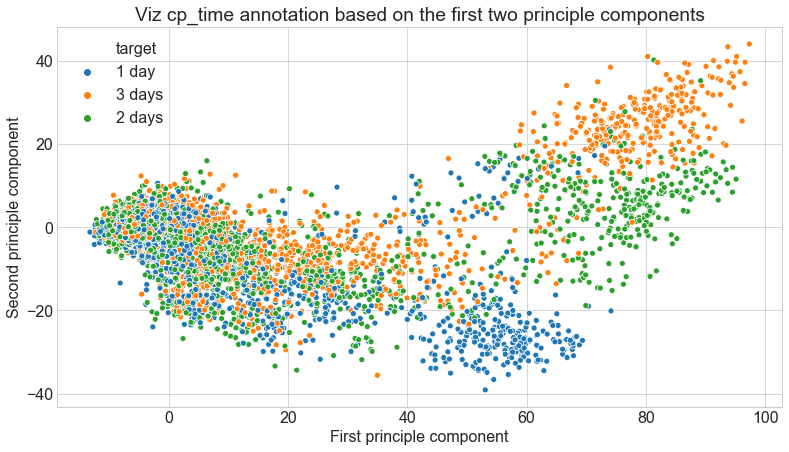

In [29]:
# cp_time
explore.pca_viz_condition(df_features, df_targets, 'cp_time')

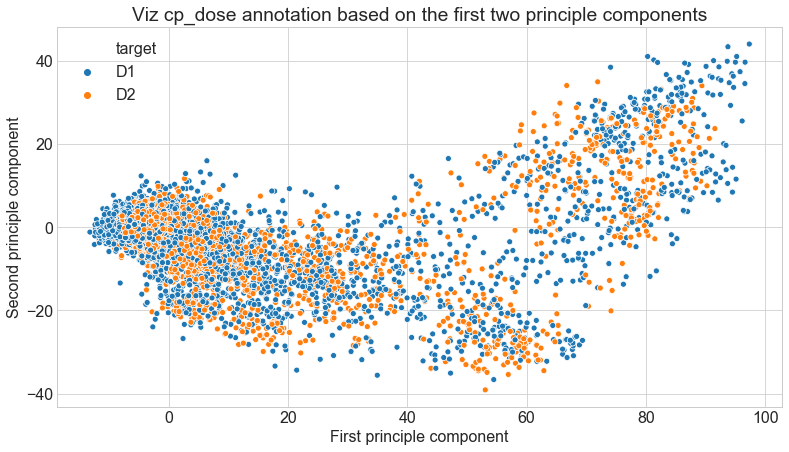

In [8]:
# cp_dose
explore.pca_viz_condition(df_features, df_targets, 'cp_dose')